<a href="https://colab.research.google.com/github/pjojoa/Analisis-Exploratorio-datos/blob/main/An%C3%A1lisis_exploratorio_datos_Taller_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ANALISIS EXPLORATORIO DE DATOS

## Desarrollo Taller 2

In [151]:
#TALLER 2 COMPARTE TU ANALISIS UNIVARIADO

#Este conjunto de datos contiene a resistencia real a la compresión del concreto (MPa) para una mezcla dada bajo una edad específica (días), la cual se determinó en laboratorio.
#El hormigón es el material más importante de la ingeniería civil. La resistencia a la compresión del hormigón es una función altamente no lineal de la edad y los ingredientes.
#Estos ingredientes incluyen cemento, escoria de alto horno, cenizas volantes, agua, superplastificante, agregado grueso y agregado fino.

#Analizaremos la columna de resistencia, la cual tiene los resultados de compresión del concreto bajo 8 caractreristicas y una Edad de maduración definida. La resistencia del concreto es vital
#en el desarrollo de un proyecto civil, con el fin de lograr durabilidad, funcionalidad y seguridad.


#00 Importar la librerias para nuetro analisis y nuestros datos.

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/concrete.csv")
df.to_csv("concreto.csv", index=False)

#01 Mostramos la composición de nuestro dataframe.
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06


In [152]:
#02 Ajustamos nombres de encabezados para faciliar la interpretación
df.columns = ['Cemento', 'Escoria', 'Cenizas_volantes', 'Agua', 'Superplastificante', 'Agregrado_grueso',
       'Agregado_Fino', 'Edad', 'Resistencia_Mpa']

df

,Cemento,Escoria,Cenizas_volantes,Agua,Superplastificante,Agregrado_grueso,Agregado_Fino,Edad,Resistencia_Mpa
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06


In [153]:
#03 Inspeccionamos los tipos de datos de las variables de datos
df.dtypes


,0
Cemento,float64
Escoria,float64
Cenizas_volantes,float64
Agua,float64
Superplastificante,float64
Agregrado_grueso,float64
Agregado_Fino,float64
Edad,int64
Resistencia_Mpa,float64


In [154]:
#04 Información general de nuestro dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cemento             1030 non-null   float64
 1   Escoria             1030 non-null   float64
 2   Cenizas_volantes    1030 non-null   float64
 3   Agua                1030 non-null   float64
 4   Superplastificante  1030 non-null   float64
 5   Agregrado_grueso    1030 non-null   float64
 6   Agregado_Fino       1030 non-null   float64
 7   Edad                1030 non-null   int64  
 8   Resistencia_Mpa     1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [155]:
#05 Elejimos 1 columna de importancia para nuestro taller y realizamos un inspección estadistica de las misma.
#Se escogio la columna Resistencia_Mpa la cual nos muetra los resultados de resitencia dependiendo las variables anteriores descritas.
df[["Resistencia_Mpa"]].describe()

,Resistencia_Mpa
count,1030.000000
mean,35.817961
std,16.705742
min,2.330000
25%,23.710000
50%,34.445000
75%,46.135000
max,82.600000


(array([ 45., 133., 156., 181., 196., 112., 100.,  52.,  36.,  19.]),
 array([ 2.33 , 10.357, 18.384, 26.411, 34.438, 42.465, 50.492, 58.519,
        66.546, 74.573, 82.6  ]),
 <BarContainer object of 10 artists>)

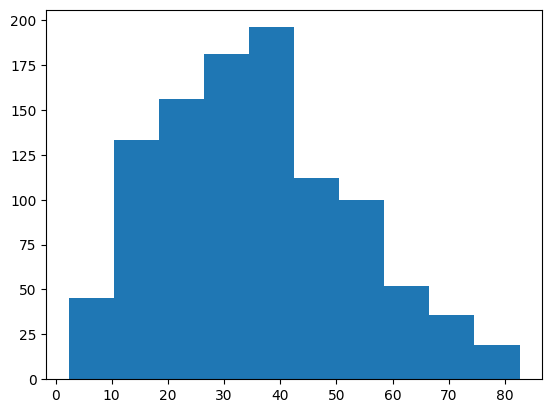

In [156]:
#06 Mediante un Histograma identificaremos las resistencia que tiene mayor frecuencia
import matplotlib.pyplot as plt
plt.hist (df ["Resistencia_Mpa"])

#Se identifica que los valores con mayor frecuencia en cuanto a la resistencia estan entre 20 y 40 Mpa.
#Recordando en código anterior tenemos un min = 2.33 y un max = 82.60

<Axes: xlabel='Resistencia_Mpa'>

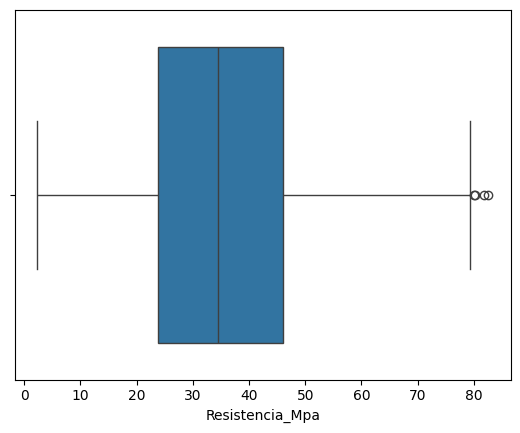

In [157]:
#07 También mediante un digrama de caja podemos afirmar las anteriores conclusiones
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x = df["Resistencia_Mpa"])

In [ ]:
#08 A continuación queremos ver la distribución de nuetsros datos y que tan dispersos se encuentran.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Calcula la media y desviación estándar de la columna "Resistencia_Mpa"
mean = df['Resistencia_Mpa'].mean()
std_dev = df['Resistencia_Mpa'].std()

# Genera los valores para la curva de la distribución normal
x_values = np.linspace(df['Resistencia_Mpa'].min(), df['Resistencia_Mpa'].max(), 100)
y_values = norm.pdf(x_values, mean, std_dev)

# Grafica el histograma de los datos y la curva de la distribución normal
plt.figure(figsize=(10, 6))
sns.histplot(df['Resistencia_Mpa'], kde=False, stat="density", bins=30, color='skyblue', label='Datos')
plt.plot(x_values, y_values, color='red', label='Distribución Normal')

# Añadir títulos y etiquetas
plt.title('Distribución de la Resistencia (Mpa)')
plt.xlabel('Resistencia (Mpa)')
plt.ylabel('Densidad')
plt.legend()

plt.show()


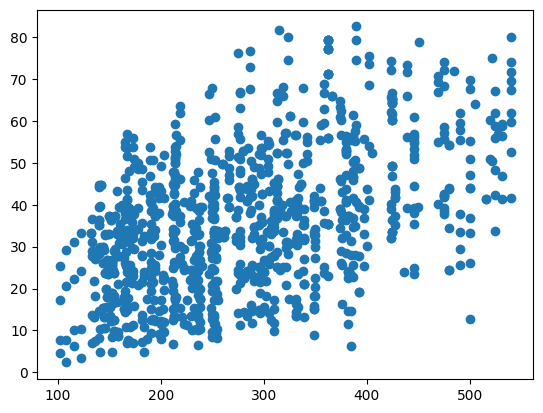

In [158]:
#08 En este caso como ejercicio comparamos la resistencia del concreto con respecto a la cantidad de cemento
# Aqui vemos que se tiene una tendencia en la que al aumentar el cemento la resistencia incrementa
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

plt.scatter(df["Cemento"], df["Resistencia_Mpa"])
plt.show()



<Axes: xlabel='Cemento', ylabel='Resistencia_Mpa'>

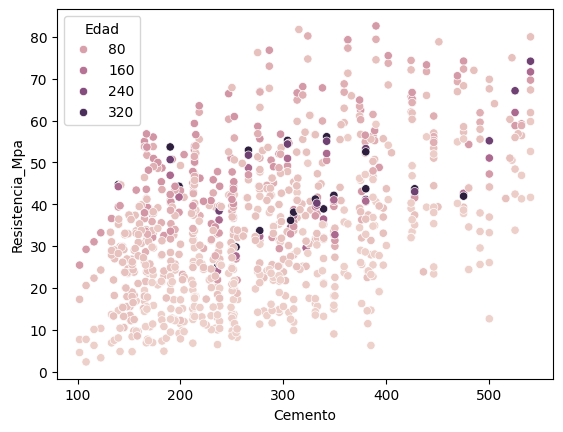

In [159]:
#09 Como segundo ejercicio complementamos la anterior premisa teniendu en cuenta la Edad de maduración.
sns.scatterplot(x = df["Cemento"], y = df["Resistencia_Mpa"], hue = df["Edad"])

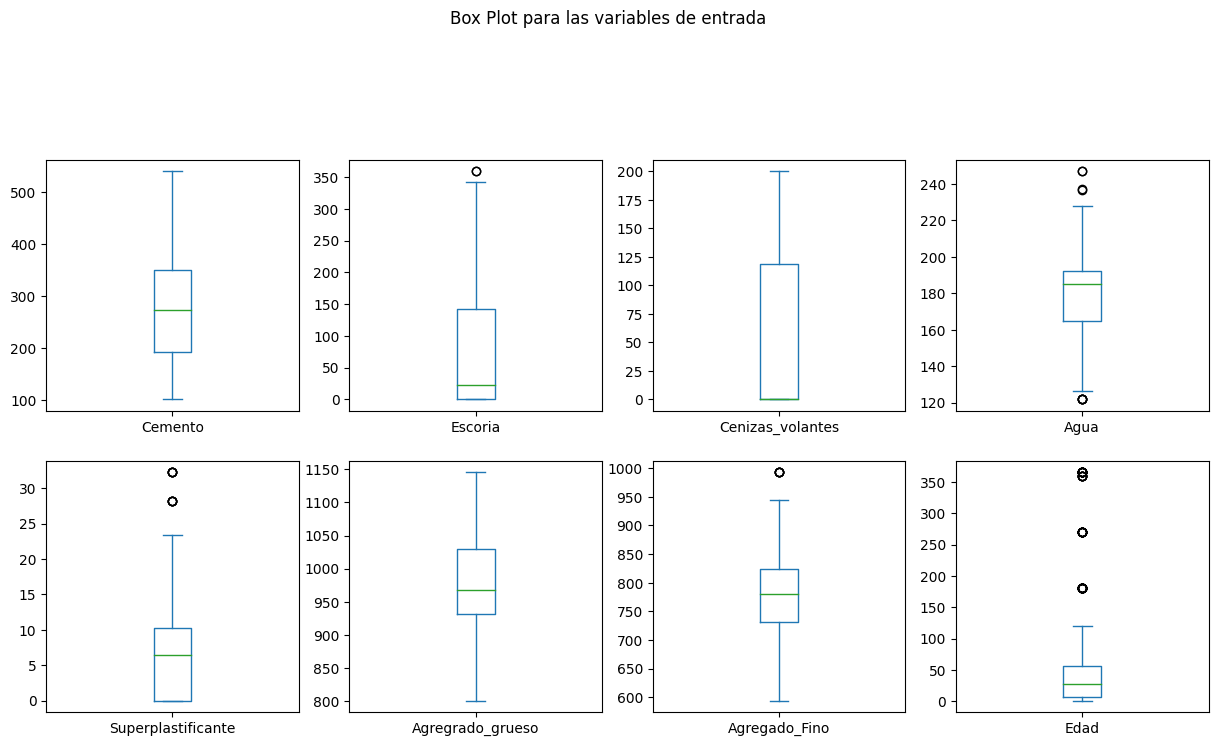

In [160]:
#10 Como ejercicio analizamos las 8 variables que modifican la resistencia del concreto.
df.drop('Resistencia_Mpa', axis=1).plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(15,15), title='Box Plot para las variables de entrada')
#plt.savefig('vino')
plt.show()

In [161]:
# 11 Finalmente complemetamos el anterior grafico con los siguientes resultados estadisticos.
df.describe()


,Cemento,Escoria,Cenizas_volantes,Agua,Superplastificante,Agregrado_grueso,Agregado_Fino,Edad,Resistencia_Mpa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [162]:
#Conclusiónes:
#Tras el análisis de una columna de nuestro Dataframe, en este caso la columna “Resistencia_Mpa” #tenemos las siguientes conclusiones:
#La columna se compone por números dlotantes es decir con decimales
# La columna no presenta datos nulos.
#Se observo que las resistencias con mas frecuencia se encuentran en un rango de  20  a 45 Mpa.
# El valor mínimo de la resistencia es de 2.33 para una edad de maduración de 1 día.
#El valor máximo de la resistencia es de 82.6 para una edad de 365 días
#Con las 2 anteriores premisas podemos inferir que la resistencia es directamente proporcional con la Edad de maduración.
# Los datos presentan una dispersión moderada pues la mayoría de sus datos están cercanos a la media.


## Desarrollo Taller 3

In [163]:
#TALLER 3 COMPARTE TU ANALISIS BIVARIADO
#Para nuestro ánalisis bivariado contimuamos con este Dataset
# Nuesto objetivo sera identificar que variables son las mas representativas en la resistencia del concreto en MPA.

#00 Identificamos cuantas filas repetidas tenemos en nuestros datos
df.duplicated().sum()


25

In [164]:
#01 A continuación queremos ver cuales son esas filas y cuantas veces se repiten

value_counts = df.value_counts()

repeated_values = value_counts[value_counts > 1]

print(repeated_values)

Cemento  Escoria  Cenizas_volantes  Agua   Superplastificante  Agregrado_grueso  Agregado_Fino  Edad  Resistencia_Mpa
362.6    189.0    0.0               164.9  11.6                944.7             755.8          3     35.30              4
                                                                                                28    71.30              4
                                                                                                56    77.30              4
                                                                                                91    79.30              4
425.0    106.3    0.0               153.5  16.5                852.1             887.1          56    64.30              3
                                                                                                3     33.40              3
                                                                                                7     49.20              3
                     

In [165]:
#02 Eliminamos las filas duplicadas
df_sin_duplicados = df.drop_duplicates()
df_sin_duplicados
# Es asi como tenemos un DataFrame nuevo con menor cantiadad de filas 1005 filas por 9 columnnas

,Cemento,Escoria,Cenizas_volantes,Agua,Superplastificante,Agregrado_grueso,Agregado_Fino,Edad,Resistencia_Mpa
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06


In [166]:
#03 Ahora queremos ver los valores unicos de la columna Edad, pues esta variable nos puede servir para categorizar la resistencia obtenidad a unos días determinados
df.Edad.value_counts()

,count
Edad,
28,425
3,134
7,126
56,91
14,62
90,54
100,52
180,26
91,22


In [167]:
#04 Observamos los anteriores resultados representados en porcentaje, es asi como se observa que a las Edades de 28 días, 7 días, y 3 días
#es cuando mas ensayos de compresión se han realizado

df.Edad.value_counts("normalize = True")

,proportion
Edad,
28,0.412621
3,0.130097
7,0.122330
56,0.088350
14,0.060194
90,0.052427
100,0.050485
180,0.025243
91,0.021359


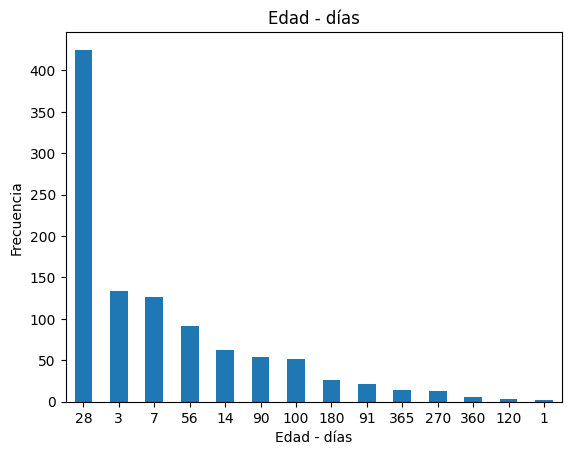

In [168]:
#05 Consolidamos la información anterior en un gráfico de barras
df.Edad.value_counts().plot(kind="bar")
plt.title("Edad - días")
plt.xlabel("Edad - días")
plt.xticks(rotation=0)
plt.ylabel("Frecuencia")
plt.show()

In [169]:
#06 Ahora vamos a analizar una parte de nuestro DataFrame y vamos a escoger los datos con mayor frecuencia con respecto a los ensayos realizados a una Edad definida.
#Teniendo en cuenta lo anterior vamos a filtrar nuestro DataFrame por la Edad, en este caso utilizaremos la Edad de 28, 3 y 7 días, las cuales representa el 66.5 % de nuestros datos.
#Es asi como crearemos un nuevo Dataframe filtrado para realizar nuestro ánalisis.

valores_para_filtrar = [28, 7, 3]

# Filtrar el DataFrame usando 'isin()' en la columna 'C'
df_28d = df[df['Edad'].isin(valores_para_filtrar)]
df_28d

,Cemento,Escoria,Cenizas_volantes,Agua,Superplastificante,Agregrado_grueso,Agregado_Fino,Edad,Resistencia_Mpa
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
...,...,...,...,...,...,...,...,...,...
1024,297.2,0.0,117.5,174.8,9.5,1022.8,753.5,3,21.91
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28


In [170]:
#Verificamos si no tenemos datos Nulos
df_28d.isnull().sum()

,0
Cemento,0
Escoria,0
Cenizas_volantes,0
Agua,0
Superplastificante,0
Agregrado_grueso,0
Agregado_Fino,0
Edad,0
Resistencia_Mpa,0


<ipython-input-179-5dc25c19cc04>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_28d['A/C'] = df_28d['Agua'] / df['Cemento']


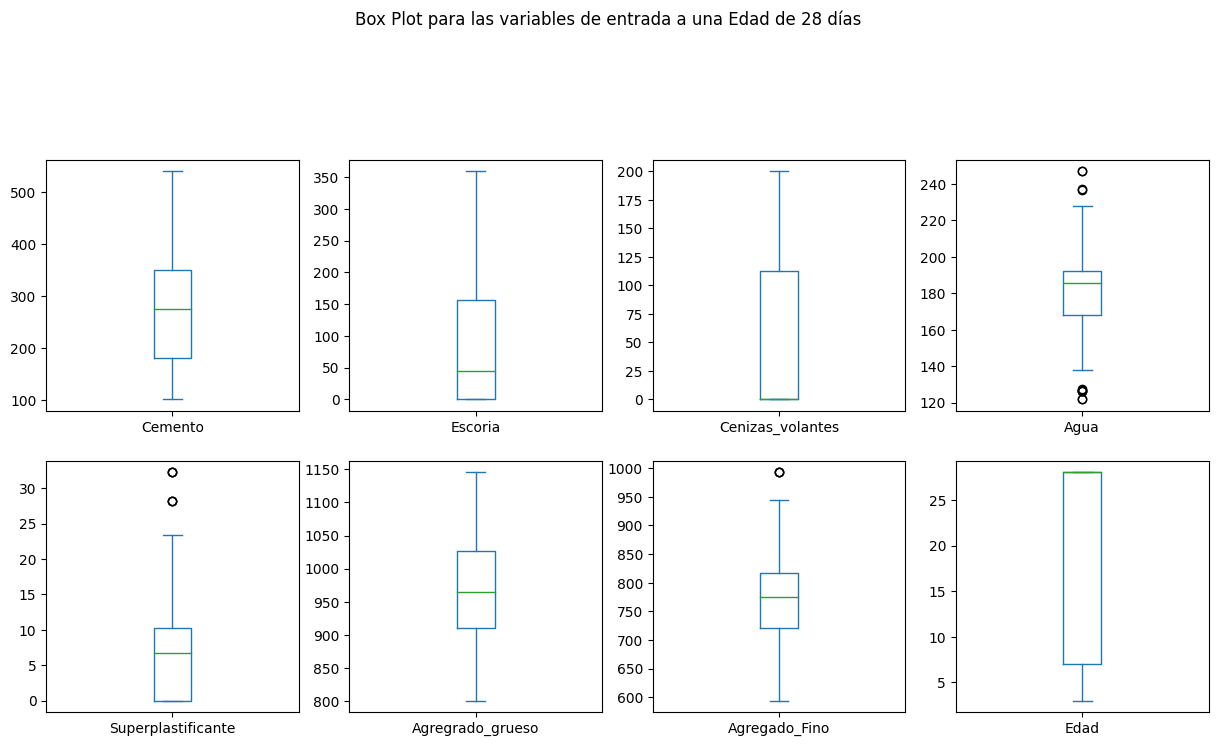




Datos estadisticos para las variables que afectan la resistencia a una Edad de 28,7 y 3 días: 



,Cemento,Escoria,Cenizas_volantes,Agua,Superplastificante,Agregrado_grueso,Agregado_Fino,Edad,Resistencia_Mpa,A/C
count,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000
mean,278.312701,83.537372,52.468613,181.757372,6.324526,965.309489,771.270657,19.246715,31.305182,0.768645
std,106.311795,89.794932,64.111102,19.420128,5.957236,81.552767,75.971940,11.267047,15.658398,0.337833
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,3.000000,2.330000,0.266893
25%,181.900000,0.000000,0.000000,168.000000,0.000000,910.000000,721.000000,7.000000,18.420000,0.517609
50%,275.100000,45.200000,0.000000,185.700000,6.700000,965.400000,775.500000,28.000000,30.140000,0.672185
75%,350.000000,157.000000,113.000000,192.000000,10.300000,1026.600000,817.000000,28.000000,40.230000,1.000000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,28.000000,81.750000,1.882353


In [179]:
#07 Realizamos un diagrma de cajas y bigotes para los variables que afectan la resistencia del concreto a una Edad de 28 días
df_28d.drop('Resistencia_Mpa', axis=1).plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(15,15), title='Box Plot para las variables de entrada a una Edad de 28 días')
#
df_28d['A/C'] = df_28d['Agua'] / df['Cemento']
plt.show()
print("")
print("")
print("")
print("" "Datos estadisticos para las variables que afectan la resistencia a una Edad de 28,7 y 3 días: ")
print("")
df_28d.describe()

<Axes: >

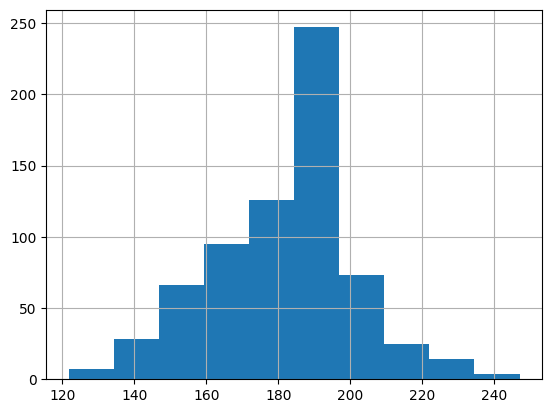

In [172]:
#08 Ahora analizaremos la variable "Cemento", como esta afecta nuestra resistencia a una Edad de 28, 7 y 3 días.
# Histograma del cemento
df_28d.Agua.hist()


In [173]:
#09 Evaluamos la distribución de esta variable
print(f"Skewness: {df['Agua'].skew()}")
print(f"Kurtosis: {df['Agua'].kurt()}")

#Observamos que skewness es cercana a 0, por lo que la distribución es simétrica, similar a una distribución normal.

Skewness: 0.07462838428549402
Kurtosis: 0.1220816743945825


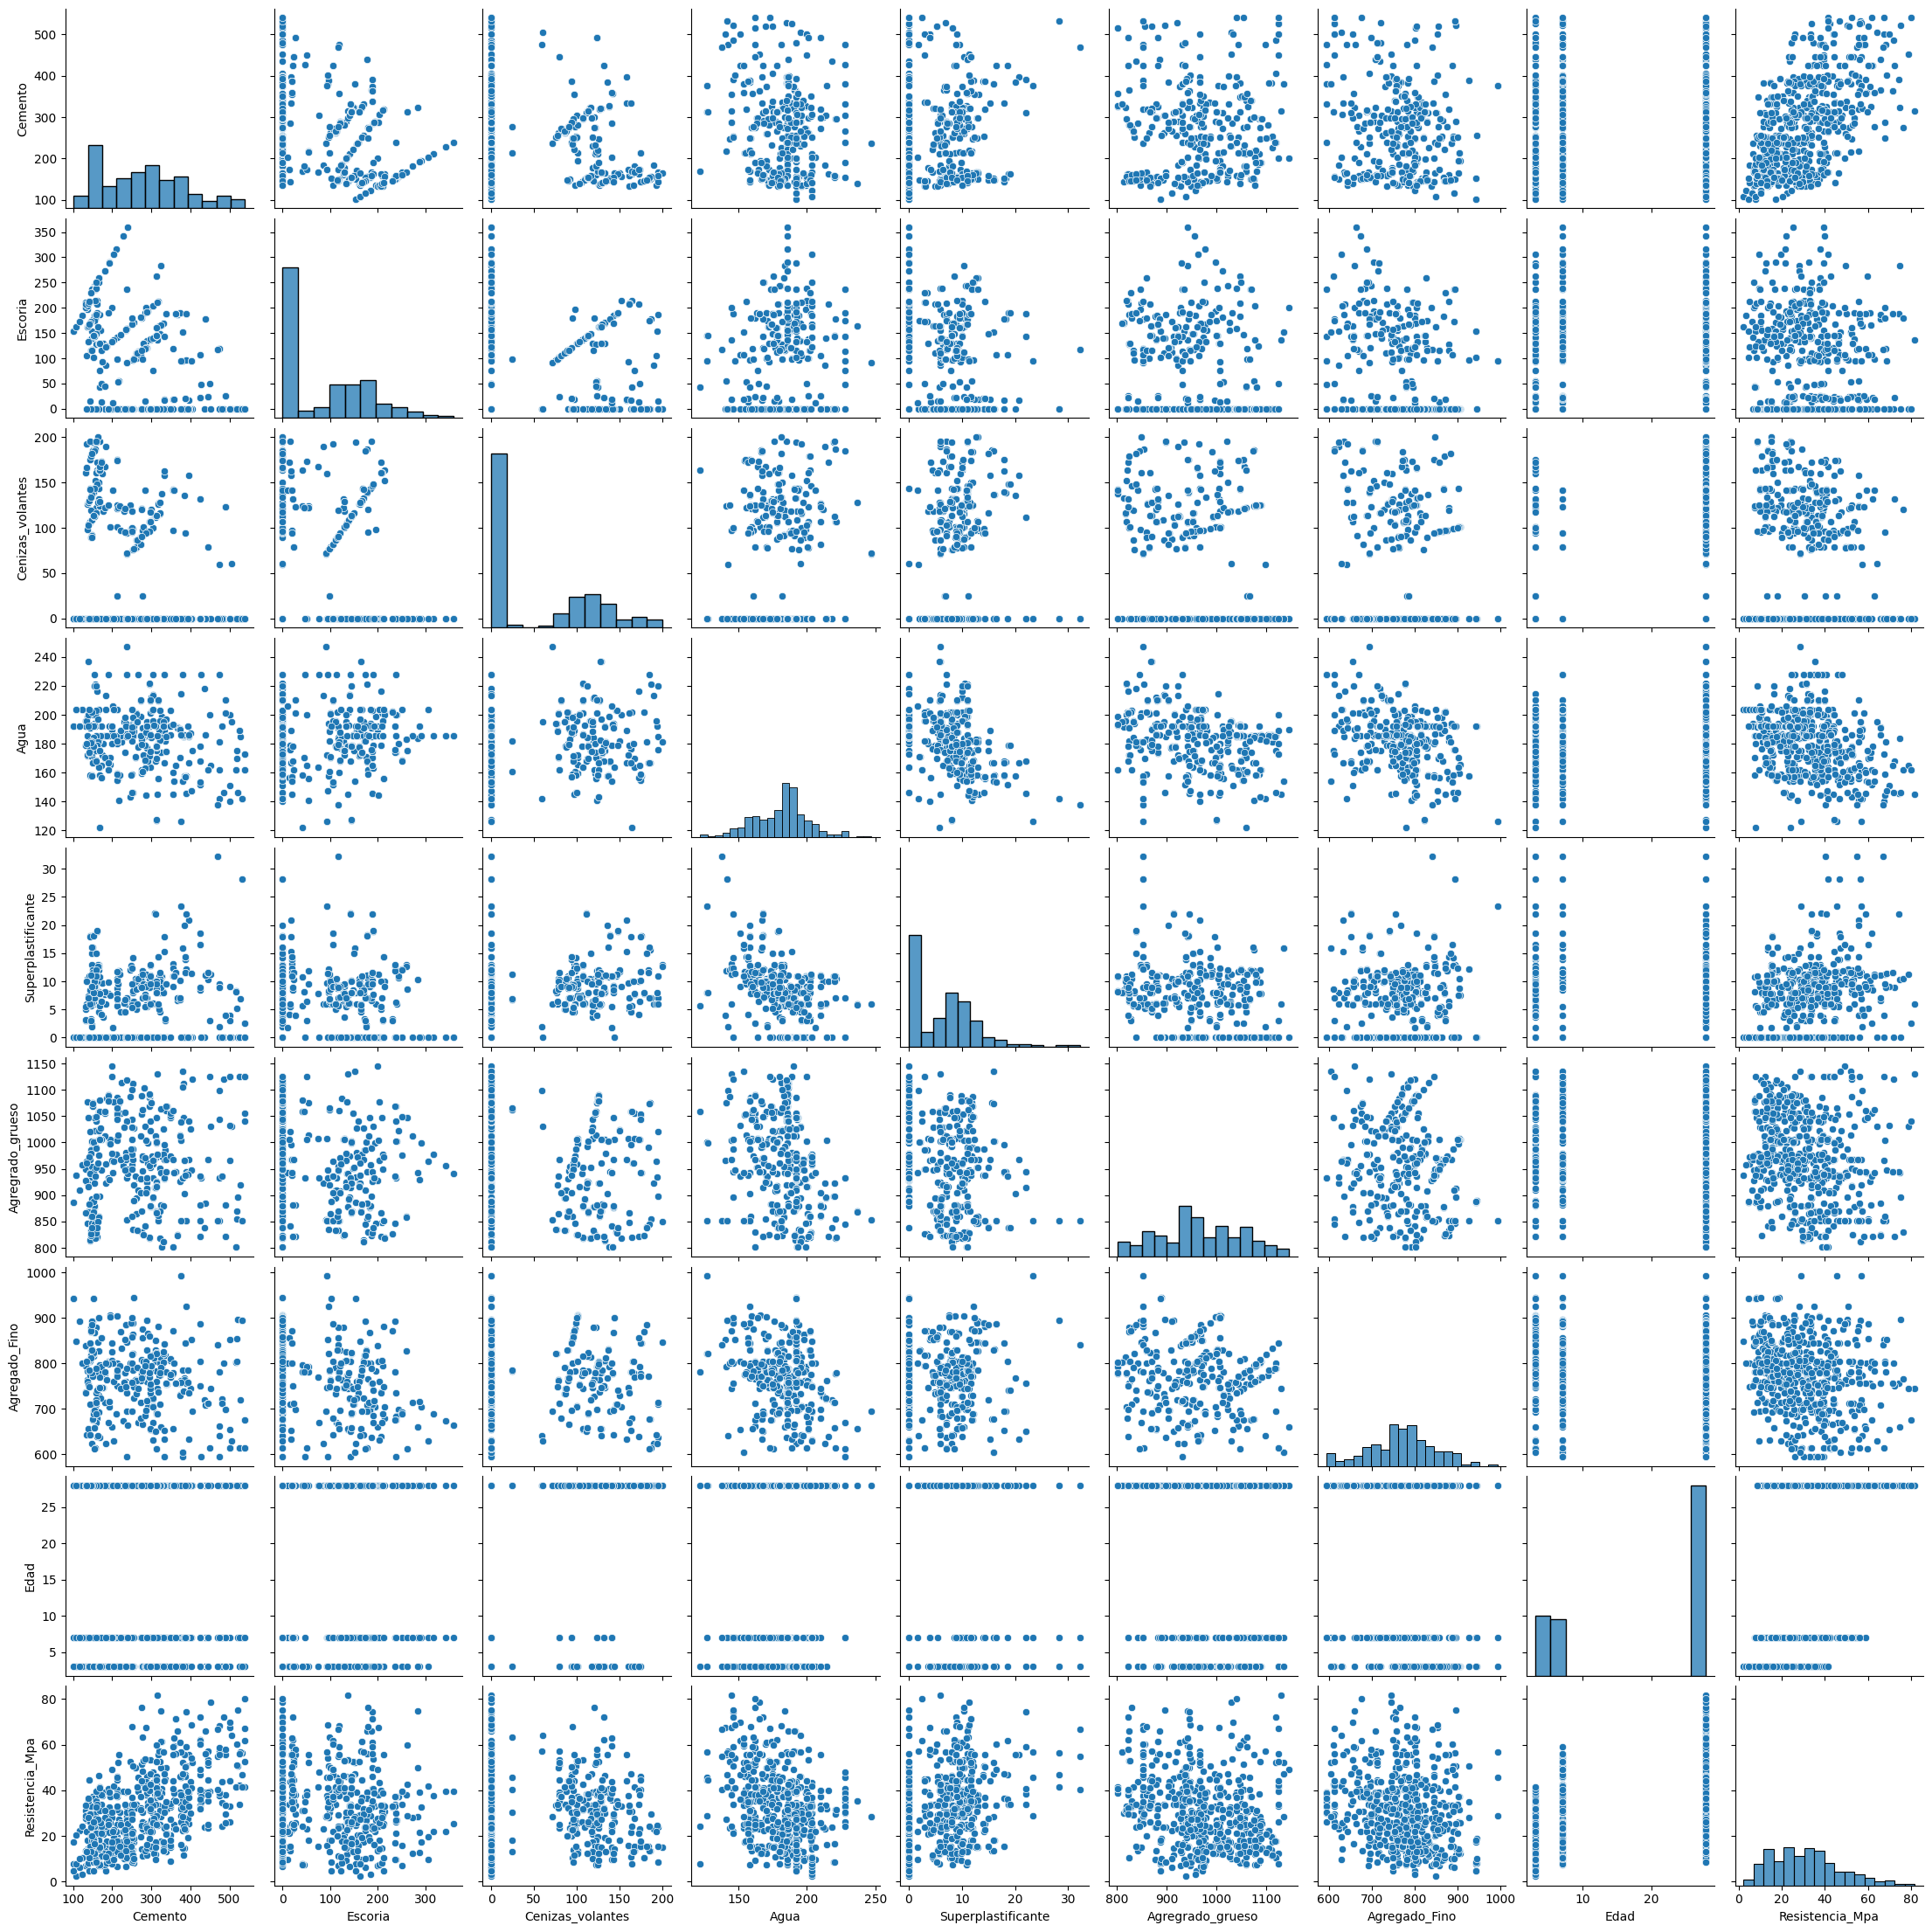

In [174]:
#10
sns.pairplot(df_28d)

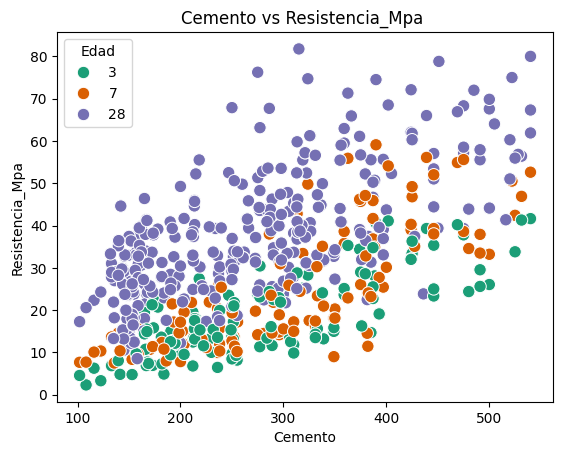

In [175]:
#11 Analizamos visualmente las relaciones y vemos un comportamiento especial del Cemento y Agua
#Analizamos la relación entre cemento y Resistencia Mpa

sns.scatterplot(x="Cemento", y="Resistencia_Mpa", hue="Edad", data=df_28d, palette="Dark2", s=80)
plt.title("Cemento vs Resistencia_Mpa ")
plt.show()

# Se puede ver la tendencia que a mayor cantidad de cemento se obtiene un aumento en la resistecnia

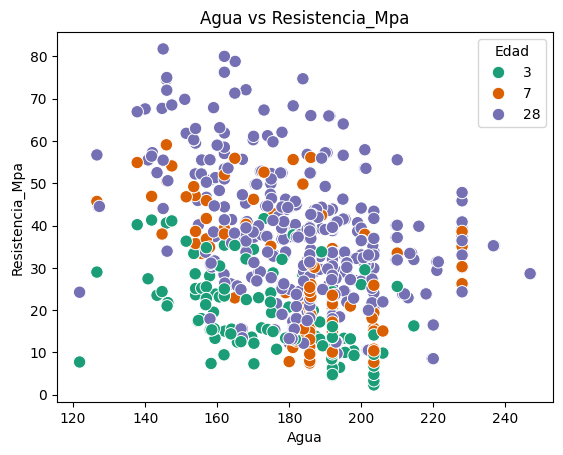

In [176]:
#12 Analizamos la relación entre Agua y Resistencia Mpa
sns.scatterplot(x="Agua", y="Resistencia_Mpa", hue="Edad", data=df_28d, palette="Dark2", s=80)
plt.title("Agua vs Resistencia_Mpa")
plt.show()

#Podemos ver que a mayor cantidad de agua la resistencia del concreto se disminuye.

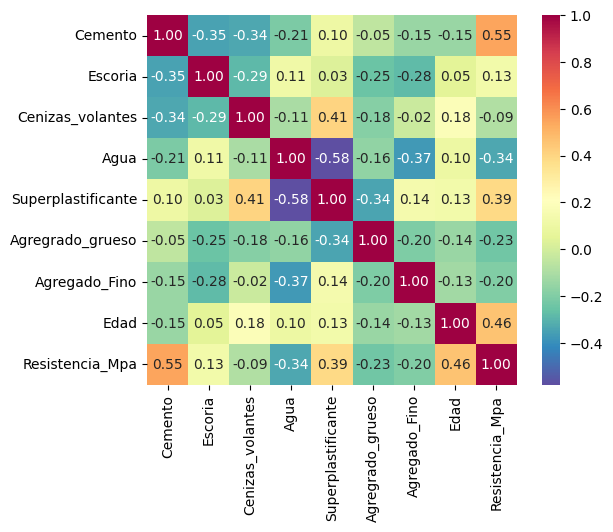

In [177]:
#13 Correlacion entre variables

corrmat = df_28d.corr()
hm = sns.heatmap(corrmat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=df.columns,
                 xticklabels=df.columns,
                 cmap="Spectral_r")
plt.show()

#Podemos ver que las variables con mayor correlación con la Resistencia_Mpa son:
#Cemento
#Agua
#Edad


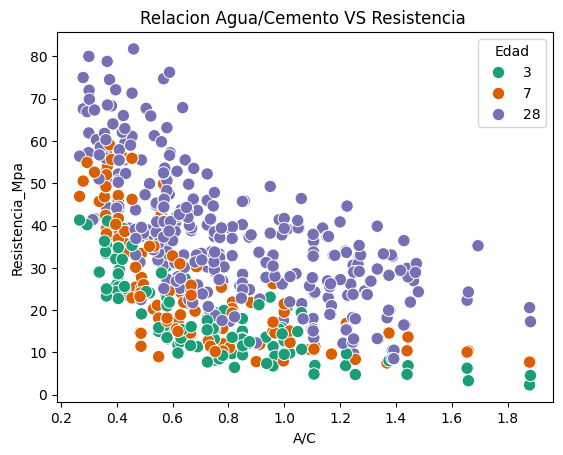

In [180]:
#14 realizamos la relación de la varible Agua con el cemento y para ello creamos la variable "A/C" y la comparamos con la Resistencia_Mpa
sns.scatterplot(x="A/C", y="Resistencia_Mpa", hue="Edad", data=df_28d, palette="Dark2", s=80)
plt.title("Relacion Agua/Cemento VS Resistencia ")
plt.show()

In [181]:
#CONCLUSIONES TALLER 3
## 01 Se realizo la toma de una muestra representativa de nuestro DataFrame y nos basamos en la columnna Edad de tipo Entero (int 64)
## 01 en la cual analizamos las edades en días con mayor frecuencia en cuanto a ensayos de compresión(28días, 7días y 3días)

## 02 Mediante el gráfico relación de variables se identifico un comportamiento especial de las variables cemento y agua
## 02 Se aprecio que a mayor cantidad de cemento > Resistencia
## 02 Se observo tambien que a > cantidad de agua se obtiene una < resistencia.


#CONCLUSIONES TALLER 3
01. Se realizo la toma de una muestra representativa de nuestro DataFrame y nos basamos en la columnna Edad de tipo Entero (int 64) en la cual analizamos las edades en días con mayor frecuencia en cuanto a ensayos de compresión(28días, 7días y 3días)

02. Mediante el gráfico relación de variables se identifico un comportamiento especial de las variables cemento y agua. Se aprecio que a mayor cantidad de cemento > Resistencia y se observo tambien que a > cantidad de agua se obtiene una < resistencia.
Desde el punto de vista economico, una mayor cantidad de cemento implica un mayor costo. > cemento > Resistencia > costo.

03. Mediante un mapa de calor identificamos que las ateriores variables Agua y cemento tienen correlaciones altas con respecto a la Resitencia del concreto.
Es asi como las unificamos mediante una divisón y creamos la relación Agua cemento "A/C", esta variable calculada se compara con la resistencia y tenemos que: La relación agua/cemento es escencial para determinar la resistencia del concreto. Una menor relación A/C resulta en un concreto más fuerte , pero si nos vamos al tema de trabajabilidad o manejo de la mezcla puede resultar difícil de trabajar. Por lo tanto, se debe encontrar un equilibrio adecuado o usar aditivos para lograr las propiedades deseadas en el concreto.